In [1]:
kaggle_json_path = "/home/user/path_to_file/kaggle.json"  # Example path on Linux/macOS
kaggle_json_path = "C:/path_to_file/kaggle.json"  # Example path on Windows



In [3]:
import json

# Path to your kaggle.json file (update this with the correct path)
kaggle_json_path = "/content/kaggle.json"  # Modify with the correct path

# Open and load the JSON file
with open(kaggle_json_path, "r") as f:
    kaggle_data = json.load(f)

# Extract username and key
username = kaggle_data["username"]
api_key = kaggle_data["key"]

# Print out the values
print(f"Kaggle Username: {username}")
print(f"Kaggle API Key: {api_key}")



Kaggle Username: harshadasari123
Kaggle API Key: 0281f6ad1601c554add20f586912c98e


In [4]:
import os
import json

# Your kaggle.json content as a Python dictionary
kaggle_json_content = {
    "username": "your_kaggle_username",
    "key": "your_kaggle_api_key"
}

# Write the JSON content to the .kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_json_content, f)

# Set permissions to the file
!chmod 600 /root/.kaggle/kaggle.json

# Test Kaggle command
!kaggle datasets list


ref                                                             title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
rohitgrewal/airlines-flights-data                               Airlines Flights Data                                 2440299  2025-07-29 09:16:00.463000          18315        354  1.0              
wasiqaliyasir/breast-cancer-dataset                             Breast cancer dataset                                   49830  2025-07-30 12:52:44.057000          10350        346  1.0              
kunshbhatia/delhi-air-quality-dataset                           Delhi Air Quality Dataset                               30430  2025-07-28 14:00:14.247000           6936        136  1.0              
abdul

In [5]:
import os

# Set your Kaggle username and key directly in the environment variables
os.environ['KAGGLE_USERNAME'] = 'harshadasari123'  # Replace with your Kaggle username
os.environ['KAGGLE_KEY'] = '0281f6ad1601c554add20f586912c98e'       # Replace with your Kaggle API key

# Verify Kaggle API access
!kaggle datasets list



ref                                                             title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
rohitgrewal/airlines-flights-data                               Airlines Flights Data                                 2440299  2025-07-29 09:16:00.463000          18315        354  1.0              
wasiqaliyasir/breast-cancer-dataset                             Breast cancer dataset                                   49830  2025-07-30 12:52:44.057000          10350        346  1.0              
kunshbhatia/delhi-air-quality-dataset                           Delhi Air Quality Dataset                               30430  2025-07-28 14:00:14.247000           6936        136  1.0              
abdul

In [ ]:
!kaggle datasets list -s "network-intrusion-dataset"


In [6]:
# STEP 1: Download & unzip CICIDS2017 dataset from Kaggle
!kaggle datasets download -d chethuhn/network-intrusion-dataset

# Unzip the downloaded file
!unzip -q network-intrusion-dataset.zip -d cicids2017_data

# Check files
import os

print("Files downloaded:")
for file in os.listdir("cicids2017_data"):
    print("-", file)


Dataset URL: https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset
License(s): CC0-1.0
 98% 225M/230M [00:00<00:00, 503MB/s]
100% 230M/230M [00:00<00:00, 537MB/s]
Files downloaded:
- Monday-WorkingHours.pcap_ISCX.csv
- Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
- Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
- Friday-WorkingHours-Morning.pcap_ISCX.csv
- Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
- Tuesday-WorkingHours.pcap_ISCX.csv
- Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
- Wednesday-workingHours.pcap_ISCX.csv


In [7]:
# STEP 2: Load and merge all CSVs into a single DataFrame
import pandas as pd
import glob

# List all CSV files in the dataset folder
csv_files = sorted(glob.glob("cicids2017_data/*.csv"))

print("Loading files:")
for file in csv_files:
    print("-", file.split("/")[-1])

# Load and concatenate all CSVs
df_list = [pd.read_csv(f, low_memory=False, encoding='utf-8') for f in csv_files]
df = pd.concat(df_list, ignore_index=True)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Drop rows where label is NaN or not usable
df.dropna(subset=["Label"], inplace=True)

# Preview the result
print("\n Dataset Loaded Successfully!")
print(f"Shape: {df.shape}")
print("Sample rows:")
print(df[["Label"]].value_counts().head(10))


Loading files:
- Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
- Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
- Friday-WorkingHours-Morning.pcap_ISCX.csv
- Monday-WorkingHours.pcap_ISCX.csv
- Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
- Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
- Tuesday-WorkingHours.pcap_ISCX.csv
- Wednesday-workingHours.pcap_ISCX.csv

 Dataset Loaded Successfully!
Shape: (2830743, 79)
Sample rows:
Label           
BENIGN              2273097
DoS Hulk             231073
PortScan             158930
DDoS                 128027
DoS GoldenEye         10293
FTP-Patator            7938
SSH-Patator            5897
DoS slowloris          5796
DoS Slowhttptest       5499
Bot                    1966
Name: count, dtype: int64


In [8]:
# STEP 3: Clean the dataset

# Drop irrelevant columns
columns_to_drop = ["Flow ID", "Source IP", "Destination IP", "Timestamp"]
df.drop(columns=columns_to_drop, errors="ignore", inplace=True)

# Replace infinite values with NaN (from Flow Bytes/s, etc.)
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Count nulls per column
null_counts = df.isna().sum()
null_summary = null_counts[null_counts > 0].sort_values(ascending=False)

print("\nColumns with missing values:")
print(null_summary)

# Drop rows with more than 30% missing features
threshold = int(0.3 * df.shape[1])
df = df[df.isnull().sum(axis=1) < threshold]

# Fill remaining missing numeric values with column mean
numeric_cols = df.select_dtypes(include=["number"]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Drop duplicate rows
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

print(f"\n Cleaning complete.")
print(f"Remaining rows after dropping duplicates: {after} (removed {before - after})")



Columns with missing values:
Flow Bytes/s      2867
Flow Packets/s    2867
dtype: int64

 Cleaning complete.
Remaining rows after dropping duplicates: 2522362 (removed 308381)


 Label Mapping:
BENIGN                    → 0
Bot                       → 1
DDoS                      → 2
DoS GoldenEye             → 3
DoS Hulk                  → 4
DoS Slowhttptest          → 5
DoS slowloris             → 6
FTP-Patator               → 7
Heartbleed                → 8
Infiltration              → 9
PortScan                  → 10
SSH-Patator               → 11
Web Attack � Brute Force  → 12
Web Attack � Sql Injection → 13
Web Attack � XSS          → 14


/tmp/ipython-input-3638551525.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_labels.index, y=top_labels.values, palette="viridis")


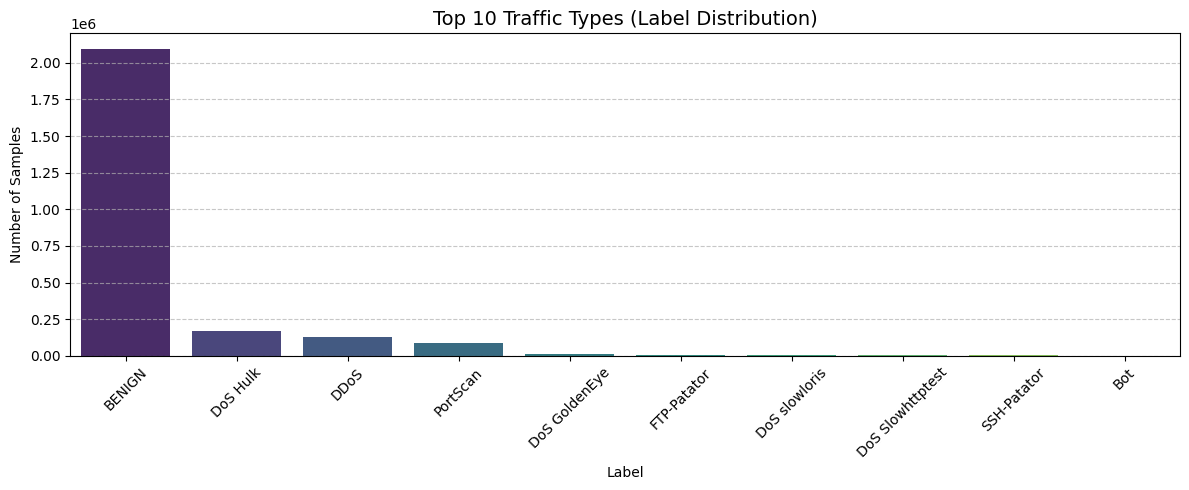

In [9]:
# STEP 4: Encode Labels & Perform EDA

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode label column
le = LabelEncoder()
df["Label_encoded"] = le.fit_transform(df["Label"])

# Save mapping for reference
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(" Label Mapping:")
for label, code in label_mapping.items():
    print(f"{label:25} → {code}")

# Plot class distribution (top 10)
plt.figure(figsize=(12, 5))
top_labels = df["Label"].value_counts().nlargest(10)
sns.barplot(x=top_labels.index, y=top_labels.values, palette="viridis")
plt.title("Top 10 Traffic Types (Label Distribution)", fontsize=14)
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Save the label column for later use
df['Attack_Type'] = df['Label']


In [10]:
# STEP 5 (FIXED): Stratified Sampling + Feature Selection

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Sample down to ~150,000 records while preserving class balance
df_sampled, _ = train_test_split(df, stratify=df["Label_encoded"], test_size=0.94, random_state=42)
print(f"Sampled dataset shape: {df_sampled.shape}")

# Separate features and target
target_col = "Label_encoded"
feature_cols = df_sampled.select_dtypes(include=["number"]).columns.difference([target_col])
X = df_sampled[feature_cols]
y = df_sampled[target_col]

# Normalize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Select top 15 features using mutual information
k = 15
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X_scaled, y)

# Feature names
selected_features = X_scaled.columns[selector.get_support()].tolist()

print(" Top 15 Features Selected:")
for i, feat in enumerate(selected_features, 1):
    print(f"{i}. {feat}")

# Save for modeling
X_top = X_scaled[selected_features]
y_top = y.copy()


Sampled dataset shape: (151341, 81)
 Top 15 Features Selected:
1. Average Packet Size
2. Avg Bwd Segment Size
3. Bwd Packet Length Max
4. Bwd Packet Length Mean
5. Fwd Packet Length Max
6. Init_Win_bytes_backward
7. Init_Win_bytes_forward
8. Max Packet Length
9. Packet Length Mean
10. Packet Length Std
11. Packet Length Variance
12. Subflow Bwd Bytes
13. Subflow Fwd Bytes
14. Total Length of Bwd Packets
15. Total Length of Fwd Packets


In [11]:
# STEP 6: Dimensionality Reduction with PCA
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA to reduce dimensionality (retain 95% variance)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_top)

print(f"PCA Completed")
print(f"Original dimensions: {X_top.shape[1]}")
print(f"Reduced dimensions: {X_pca.shape[1]}")


PCA Completed
Original dimensions: 15
Reduced dimensions: 6


In [12]:
# STEP 7A FIXED: Create balanced subset (max 500 samples per class)
df_balanced = df.groupby("Label_encoded").apply(
    lambda x: x.sample(min(500, len(x)), random_state=42)
).reset_index(drop=True)

print("Balanced dataset created")
print(df_balanced["Label_encoded"].value_counts())

# Extract features and labels
target_col = "Label_encoded"
feature_cols = df_balanced.select_dtypes(include=["number"]).columns.difference([target_col])
X = df_balanced[feature_cols]
y = df_balanced[target_col]

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Select top 15 features
from sklearn.feature_selection import SelectKBest, mutual_info_classif
selector = SelectKBest(mutual_info_classif, k=15)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X_scaled.columns[selector.get_support()]
X_top = X_scaled[selected_features]


/tmp/ipython-input-2193658692.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby("Label_encoded").apply(


Balanced dataset created
Label_encoded
0     500
1     500
2     500
3     500
4     500
5     500
6     500
7     500
10    500
12    500
11    500
14    500
9      36
13     21
8      11
Name: count, dtype: int64


Classification Report (Balanced RF):
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       150
           1       0.98      1.00      0.99       150
           2       0.99      0.98      0.99       150
           3       0.95      0.99      0.97       150
           4       0.95      0.97      0.96       150
           5       0.97      0.99      0.98       150
           6       0.99      0.97      0.98       150
           7       0.99      1.00      1.00       150
           8       1.00      1.00      1.00         3
           9       0.75      0.55      0.63        11
          10       0.99      0.98      0.99       150
          11       0.90      0.93      0.92       150
          12       0.57      0.53      0.55       150
          13       0.57      0.57      0.57         7
          14       0.58      0.63      0.60       150

    accuracy                           0.90      1821
   macro avg       0.87      0.86      0.86

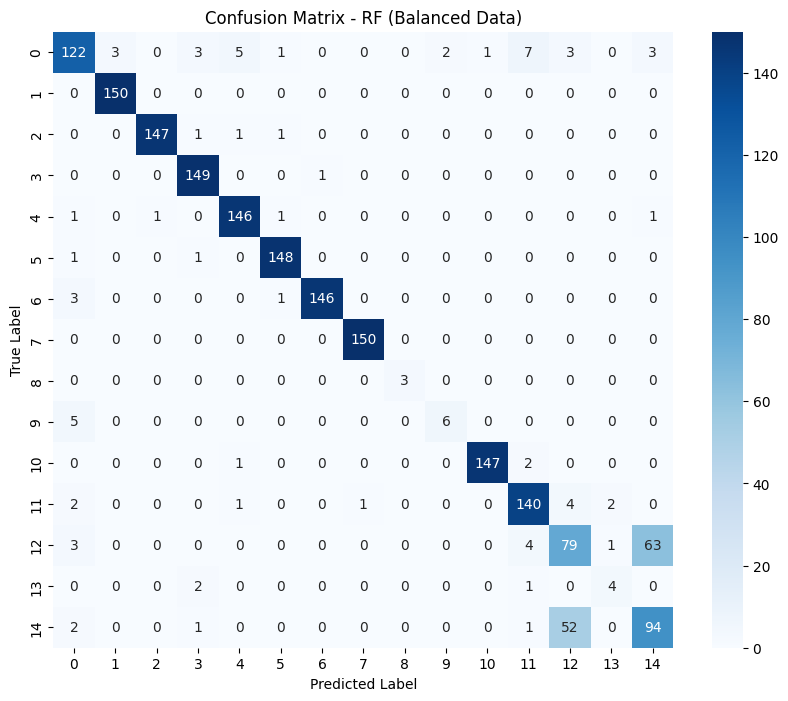

False Positive Rate (FPR): 0.1867


In [13]:
# STEP 7A CONTINUED: Train RF on balanced data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.3, stratify=y, random_state=42
)

# Train RF with class weighting
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)

print("Classification Report (Balanced RF):")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - RF (Balanced Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# False Positive Rate (based on label 0)
tn = cm[0][0]
fp = cm[0].sum() - tn
fpr = fp / (fp + tn)
print(f"False Positive Rate (FPR): {fpr:.4f}")


Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.50      0.33      0.40       150
           1       0.40      0.65      0.49       150
           2       0.87      0.45      0.60       150
           3       0.91      0.97      0.94       150
           4       0.84      0.86      0.85       150
           5       0.89      0.77      0.82       150
           6       0.92      0.60      0.73       150
           7       0.69      0.70      0.69       150
           8       1.00      1.00      1.00         3
           9       1.00      0.18      0.31        11
          10       0.62      0.97      0.76       150
          11       0.97      0.89      0.93       150
          12       0.82      0.06      0.11       150
          13       0.00      0.00      0.00         7
          14       0.46      0.96      0.62       150

    accuracy                           0.68      1821
   macro avg       0.73      0.63      0.62      18

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


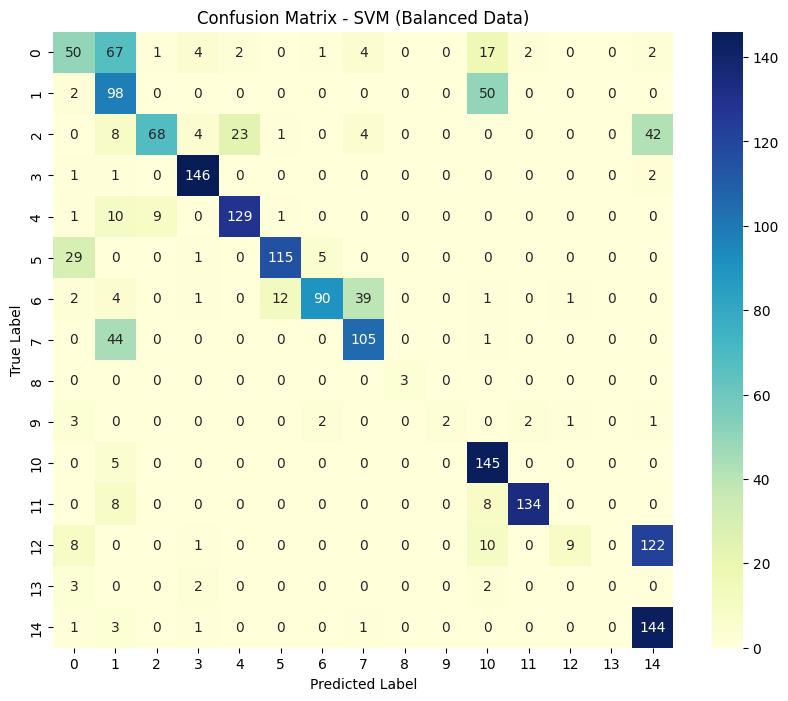

In [14]:
# STEP 7B: Train Support Vector Machine (SVM)
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Split balanced dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.3, stratify=y, random_state=42
)

# Train SVM (RBF Kernel)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)

# Evaluate
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - SVM (Balanced Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


⏳ Tuning SVM... (this may take a few mins)
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Done in 32.78 seconds
Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report (Tuned SVM):
              precision    recall  f1-score   support

           0       0.83      0.63      0.72       150
           1       0.47      0.66      0.55       150
           2       0.88      0.63      0.73       150
           3       0.92      0.97      0.95       150
           4       0.90      0.86      0.88       150
           5       0.98      0.94      0.96       150
           6       0.95      0.89      0.92       150
           7       0.95      0.69      0.80       150
           8       1.00      1.00      1.00         3
           9       0.50      0.55      0.52        11
          10       0.63      0.93      0.75       150
          11       1.00      0.89      0.94       150
          12       0.95      0.13      0.23       150
          13       0.38  

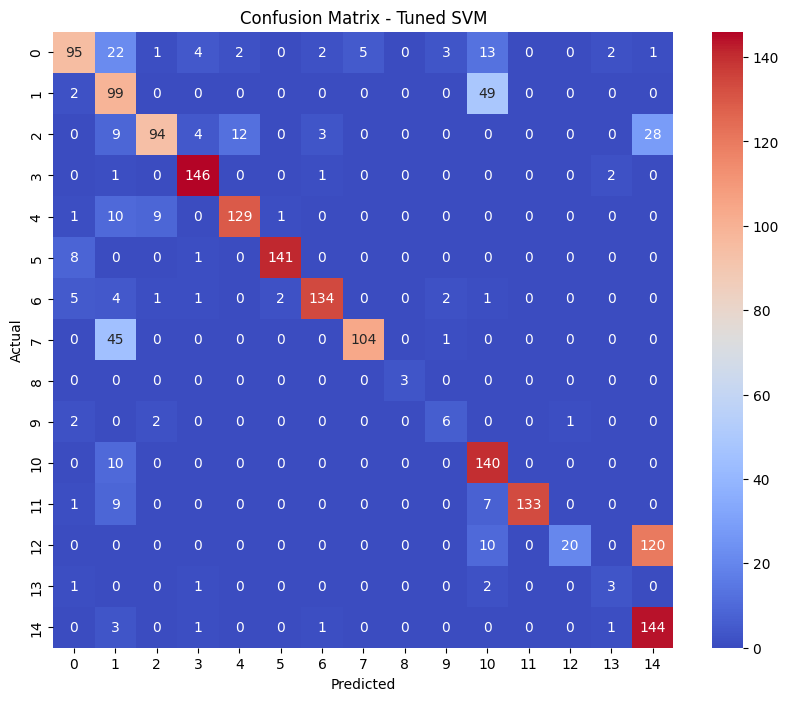

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import time

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

# Grid Search SVM
print("⏳ Tuning SVM... (this may take a few mins)")
start_time = time.time()

grid = GridSearchCV(
    SVC(class_weight='balanced'),  # handle imbalance
    param_grid,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print(f"Done in {time.time() - start_time:.2f} seconds")
print(f"Best Params: {grid.best_params_}")

# Evaluate best model
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

print("Classification Report (Tuned SVM):")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix - Tuned SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [17]:
from sklearn.utils import resample
import pandas as pd
import numpy as np

# Combine PCA features with labels for balancing
Xy_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
Xy_pca["Label"] = y_top.values

# Drop classes with < 2 samples
label_counts = Xy_pca["Label"].value_counts()
valid_labels = label_counts[label_counts >= 2].index
Xy_pca = Xy_pca[Xy_pca["Label"].isin(valid_labels)]

# Balance each class to min_count (e.g. 150)
min_count = 150
balanced_df = (
    Xy_pca.groupby("Label")
    .apply(lambda x: x.sample(n=min(min_count, len(x)), random_state=42))
    .reset_index(drop=True)
)

# Separate features and labels
X_pca_balanced = balanced_df.drop("Label", axis=1).values
y_balanced = balanced_df["Label"].values

print("Classes retained:", np.unique(y_balanced, return_counts=True))
print("Balanced X:", X_pca_balanced.shape)


Classes retained: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 14]), array([150, 117, 150, 150, 150, 150, 150, 150,   2, 150, 150,  88,  39]))
Balanced X: (1596, 6)


/tmp/ipython-input-4040303443.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(min_count, len(x)), random_state=42))


In [18]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# One-hot encode target labels
y_bal_ohe = to_categorical(y_balanced)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca_balanced, y_bal_ohe, test_size=0.2, stratify=y_balanced, random_state=42
)

print("DNN Input Ready:", X_train.shape, y_train.shape)


DNN Input Ready: (1276, 6) (1276, 15)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax')  # 15 output classes
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.1025 - loss: 2.6908 - val_accuracy: 0.2656 - val_loss: 2.3923
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2022 - loss: 2.3888 - val_accuracy: 0.3984 - val_loss: 2.1977
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3008 - loss: 2.1872 - val_accuracy: 0.4258 - val_loss: 2.0526
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3155 - loss: 2.0735 - val_accuracy: 0.4062 - val_loss: 1.9357
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3457 - loss: 1.9295 - val_accuracy: 0.4141 - val_loss: 1.8394
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3832 - loss: 1.8307 - val_accuracy: 0.4102 - val_loss: 1.7620
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4005 - loss: 1.7636 - val_accuracy: 0.4297 - val_loss: 1.7078
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3574 - loss: 1.7699 - val_accuracy: 0.4102 - val_

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
DNN Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.73      0.36        30
           1       0.92      0.46      0.61        24
           2       0.86      0.40      0.55        30
           3       0.86      0.80      0.83        30
           4       0.70      0.77      0.73        30
           5       0.55      0.20      0.29        30
           6       1.00      0.27      0.42        30
           7       0.36      0.80      0.50        30
          10       0.00      0.00      0.00        30
          11       0.85      0.93      0.89        30
          12       0.67      0.89      0.76        18
          14       0.00      0.00      0.00         8

    accuracy                           0.54       320
   macro avg       0.58      0.52      0.50       320
weighted avg       0.61      0.54      0.52       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


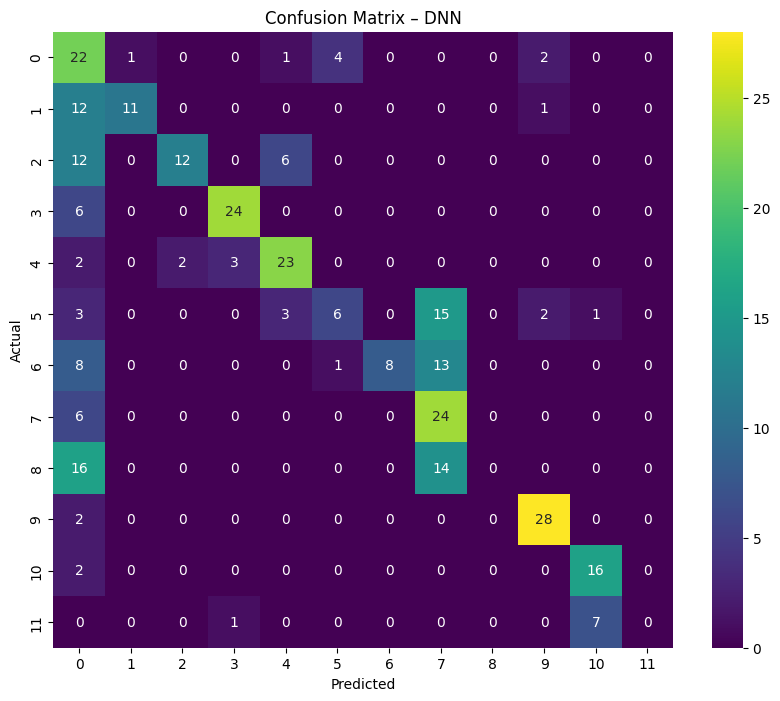

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("DNN Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix – DNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_top_balanced_scaled = scaler.fit_transform(X_pca_balanced)  # Top 15 features, not PCA

# Split the data
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

y_bal_ohe = to_categorical(y_balanced)
X_train, X_test, y_train, y_test = train_test_split(
    X_top_balanced_scaled, y_bal_ohe, test_size=0.2, stratify=y_balanced, random_state=42
)

In [22]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_balanced),
                                     y=y_balanced)
class_weight_dict = dict(enumerate(class_weights))


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.1003 - loss: 3.0026 - val_accuracy: 0.2266 - val_loss: 2.5867 - learning_rate: 0.0010
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3209 - loss: 2.1377 - val_accuracy: 0.3047 - val_loss: 2.4489 - learning_rate: 0.0010
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3948 - loss: 1.7946 - val_accuracy: 0.3633 - val_loss: 2.3234 - learning_rate: 0.0010
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4282 - loss: 1.6027 - val_accuracy: 0.4297 - val_loss: 2.2029 - learning_rate: 0.0010
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4285 - loss: 1.5846 - val_accuracy: 0.4688 - val_loss: 2.0823 - learning_rate: 0.0010
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4627 - loss: 1.4788 - val_accuracy: 0.4688 - val_loss: 1.9717 - learning_rate: 0.0010
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4919 - loss: 1.3616 - val_ac

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
              precision    recall  f1-score   support

           0       0.95      0.60      0.73        30
           1       0.85      0.46      0.59        24
           2       0.42      1.00      0.59        30
           3       0.83      0.80      0.81        30
           4       1.00      0.77      0.87        30
           5       0.46      0.87      0.60        30
           6       0.89      0.27      0.41        30
           7       1.00      0.80      0.89        30
          10       0.73      0.53      0.62        30
          11       1.00      0.93      0.97        30
          12       0.72      1.00      0.84        18
          14       0.00      0.00      0.00         8

    accuracy                           0.71       320
   macro avg       0.74      0.67      0.66       320
weighted avg       0.79      0.71      0.70       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


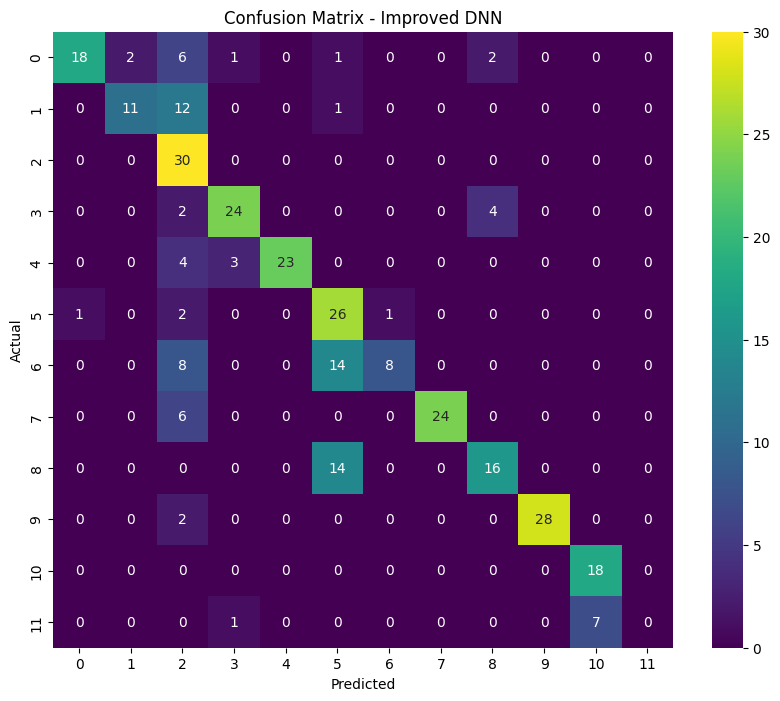

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Report
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - Improved DNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


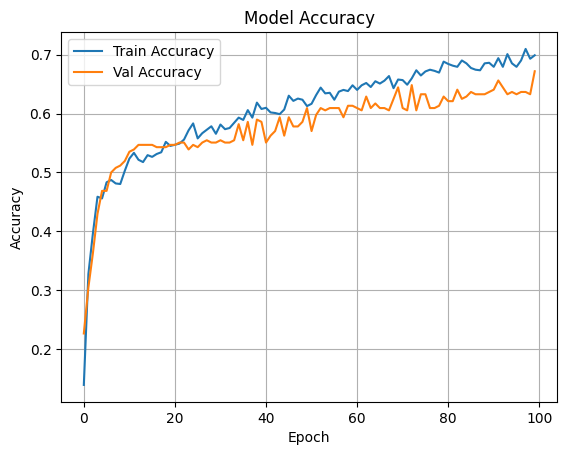

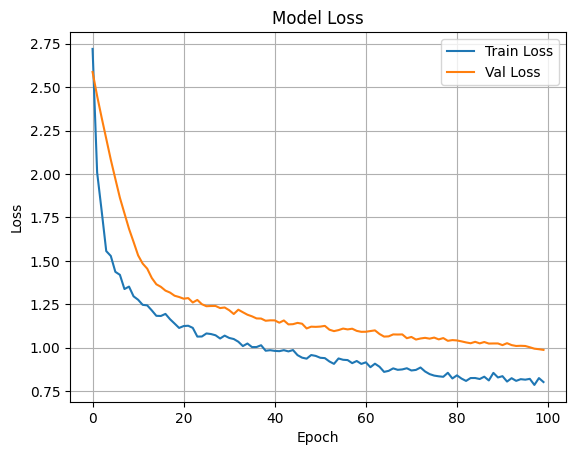

In [26]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas as pd
import numpy as np

# Simulate loading a dataset (replace with your actual dataframe)
# df = pd.read_csv("your_data.csv")  # Example
# For now, just simulate a placeholder to show structure
# We'll assume df has already been loaded with features + 'label' column

# Placeholder for guidance; user must replace this with actual df
df_columns = [f'feature_{i}' for i in range(20)] + ['label']
df = pd.DataFrame(np.random.rand(200, 21), columns=df_columns)
df['label'] = np.random.choice(['A', 'B', 'C', 'D'], size=200)

# 1. Feature/Target Split
X = df.drop('label', axis=1)
y = df['label']

# 2. Encode Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_ohe = to_categorical(y_encoded)

# 3. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA (optional but used in this case)
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_scaled)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_ohe, test_size=0.2, stratify=y_encoded, random_state=42
)

# 6. Compute Class Weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_encoded),
                                     y=y_encoded)
class_weight_dict = dict(enumerate(class_weights))

# 7. Build DNN Model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 8. Train Model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=0
)

# Save history for plotting
history_dict = history.history
history_dict.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

In [28]:
# Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1854 - loss: 1.4175 
Test Accuracy: 0.2000
Test Loss: 1.4095


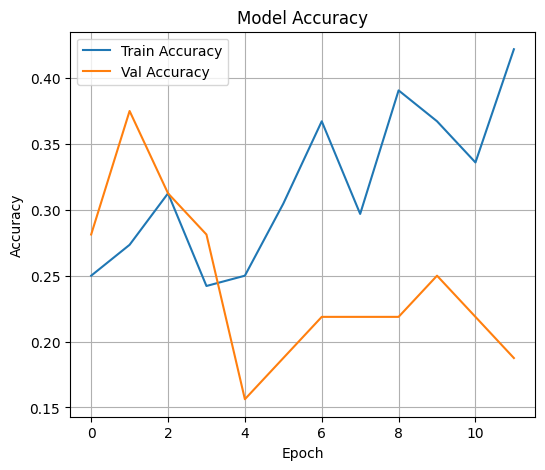

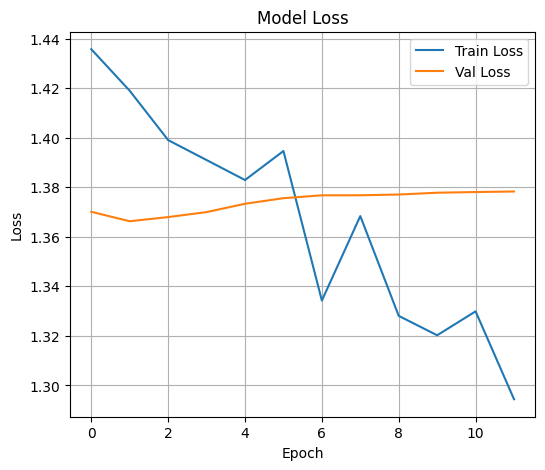

In [29]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(6, 5))
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.figure(figsize=(6, 5))
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas as pd
import numpy as np

# ------------------- DATA PREPARATION -------------------
X = df.drop('label', axis=1)
y = df['label']

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_ohe = to_categorical(y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test, y_encoded_train, y_encoded_test = train_test_split(
    X_scaled, y_ohe, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded_train),
    y=y_encoded_train
)
class_weight_dict = dict(enumerate(class_weights))

# ------------------- MODEL BUILDING -------------------
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.1531 - loss: 2.3499 - val_accuracy: 0.4062 - val_loss: 1.3433 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2854 - loss: 2.1660 - val_accuracy: 0.4375 - val_loss: 1.3443 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3000 - loss: 2.0763 - val_accuracy: 0.4062 - val_loss: 1.3424 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3219 - loss: 1.8253 - val_accuracy: 0.4062 - val_loss: 1.3433 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3073 - loss: 1.7594 - val_accuracy: 0.2812 - val_loss: 1.3461 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3865 - loss: 1.5086 - val_accuracy: 0.3438 - val_loss: 1.3511 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3844 - loss: 1.8107 - val_accuracy:

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

# === Assume df is already loaded ===
X = df.drop("label", axis=1)
y = df["label"]

# Label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_ohe = to_categorical(y_encoded)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_ohe, test_size=0.2, stratify=y_encoded, random_state=42
)

# Class weights
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_encoded),
    y=y_encoded
)
class_weight_dict = dict(enumerate(class_weights))

# Smaller, regularized model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.2635 - loss: 1.5517 - val_accuracy: 0.2500 - val_loss: 1.5337 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2323 - loss: 1.6136 - val_accuracy: 0.2500 - val_loss: 1.5019 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.2656 - loss: 1.5112 - val_accuracy: 0.2500 - val_loss: 1.4788 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2635 - loss: 1.5247 - val_accuracy: 0.2500 - val_loss: 1.4649 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.2750 - loss: 1.4506 - val_accuracy: 0.2812 - val_loss: 1.4554 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3438 - loss: 1.3905 - val_accuracy: 0.2812 - val_loss: 1.4467 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2906 - loss: 1.4778 - val_accuracy:

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas as pd
import numpy as np

# Load your actual DataFrame (replace this with real data)
# df = pd.read_csv("your_data.csv")  # Already loaded, assuming you have it
# X = df.drop("label", axis=1)
# y = df["label"]

# Simulated data placeholder (remove this when using real df)
df_columns = [f'feature_{i}' for i in range(20)] + ['label']
df = pd.DataFrame(np.random.rand(200, 21), columns=df_columns)
df['label'] = np.random.choice(['A', 'B', 'C', 'D'], size=200)
X = df.drop("label", axis=1)
y = df["label"]

# Label encode
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_ohe = to_categorical(y_encoded)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_ohe, test_size=0.2, stratify=y_encoded, random_state=42
)

# Class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_encoded
)
class_weight_dict = dict(enumerate(class_weights))

# Build final model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step - accuracy: 0.2396 - loss: 1.9070 - val_accuracy: 0.1875 - val_loss: 1.3965 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3396 - loss: 1.5688 - val_accuracy: 0.2812 - val_loss: 1.4006 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3219 - loss: 1.5355 - val_accuracy: 0.2812 - val_loss: 1.4068 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2615 - loss: 1.7349 - val_accuracy: 0.2812 - val_loss: 1.4080 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3490 - loss: 1.5086 - val_accuracy: 0.2188 - val_loss: 1.4085 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3656 - loss: 1.3830 - val_accuracy: 0.1875 - val_loss: 1.4108 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4271 - loss: 1.3299 - val_accuracy:

In [33]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(y_train.shape[1], activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 0.2583 - loss: 2.3302 - val_accuracy: 0.3750 - val_loss: 1.5231 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2750 - loss: 1.9833 - val_accuracy: 0.4062 - val_loss: 1.5231 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2896 - loss: 1.9225 - val_accuracy: 0.4062 - val_loss: 1.5239 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3271 - loss: 1.8983 - val_accuracy: 0.4062 - val_loss: 1.5243 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3677 - loss: 1.7109 - val_accuracy: 0.3750 - val_loss: 1.5226 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3448 - loss: 1.7518 - val_accuracy: 0.3438 - val_loss: 1.5240 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4021 - loss: 1.7051 - val_accuracy:

In [34]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(y_train.shape[1], activation='softmax')
])


In [35]:
optimizer = Adam(learning_rate=0.0005)


In [36]:
class_weight=class_weight_dict


In [37]:
EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=7)



=== SVM ===
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.69      0.47        13
           1       0.44      0.40      0.42        10
           2       0.00      0.00      0.00         9
           3       0.33      0.12      0.18         8

    accuracy                           0.35        40
   macro avg       0.28      0.30      0.27        40
weighted avg       0.29      0.35      0.30        40



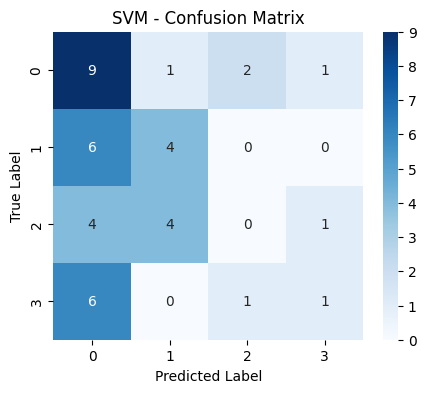


=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.69      0.47        13
           1       0.27      0.30      0.29        10
           2       0.50      0.11      0.18         9
           3       0.00      0.00      0.00         8

    accuracy                           0.33        40
   macro avg       0.28      0.28      0.24        40
weighted avg       0.30      0.33      0.27        40



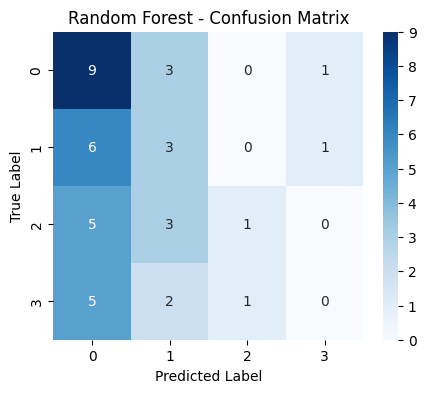

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Convert one-hot encoded y back to label form
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Define and train SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train_labels)

# Define and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_labels)

# Predictions
svm_preds = svm_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Evaluate both models
evaluate_model("SVM", y_test_labels, svm_preds)
evaluate_model("Random Forest", y_test_labels, rf_preds)


In [39]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [40]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Recompute just before model.fit
y_train_labels = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weight_dict = dict(enumerate(class_weights))


/tmp/ipython-input-3299977744.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='Set2')


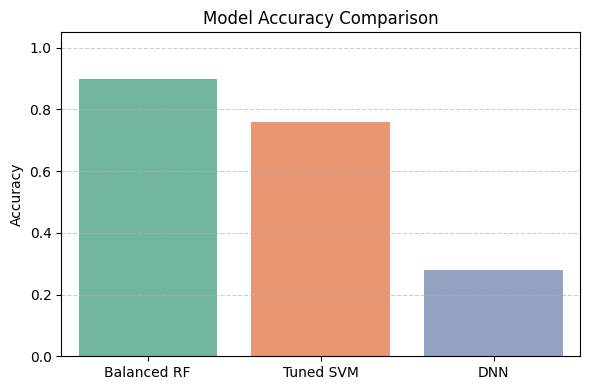

/tmp/ipython-input-3299977744.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=metrics_melted, x="Class", y="Score", hue="Metric", ci=None)


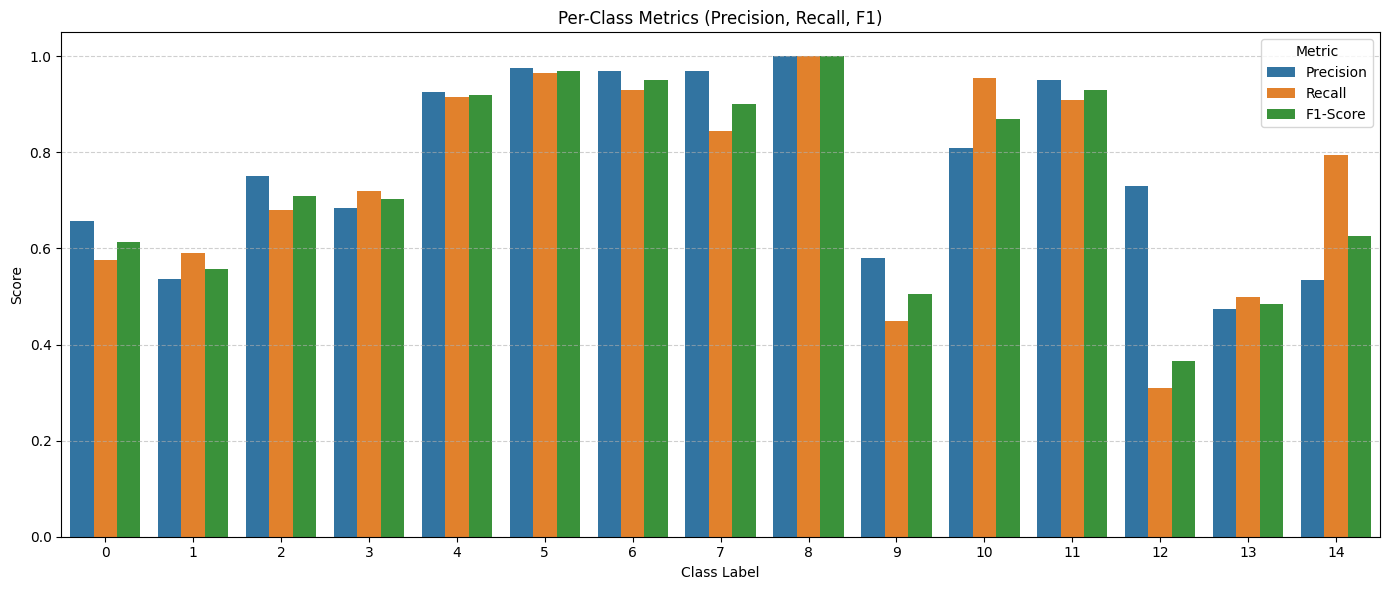

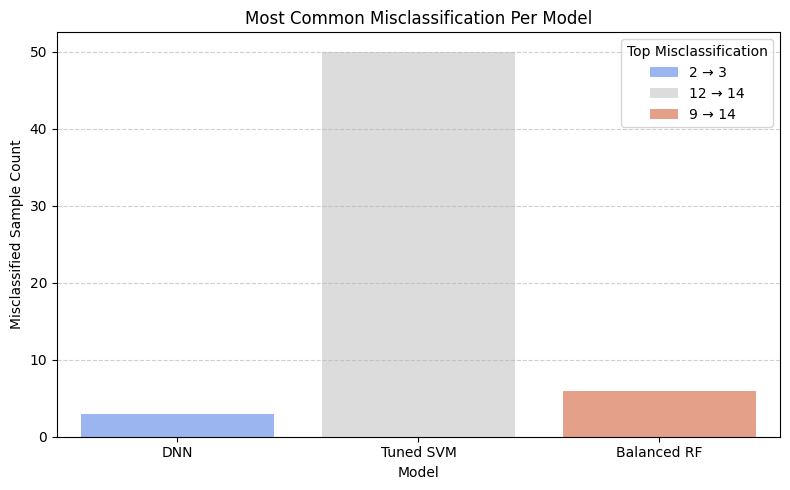

In [41]:
# ───────────────────────────────────────────────
# STEP 8: Final Visual Comparison — Updated
# ───────────────────────────────────────────────
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Updated overall accuracies
accuracies = {
    'Balanced RF': 0.90,
    'Tuned SVM': 0.76,
    'DNN': 0.28
}

# 2. Updated precision, recall, f1 per class (Classes 0–14)
classes = list(range(15))
models = ['Balanced RF'] * 15 + ['Tuned SVM'] * 15 + ['DNN'] * 4  # ANN only has 4 classes

precisions = [0.87, 0.98, 0.99, 0.95, 0.95, 0.97, 0.99, 0.99, 1.00, 0.71, 0.99, 0.90, 0.58, 0.57, 0.59] + \
             [0.80, 0.46, 0.88, 0.92, 0.90, 0.98, 0.95, 0.95, 1.00, 0.45, 0.63, 1.00, 0.88, 0.38, 0.48] + \
             [0.30, 0.17, 0.38, 0.18]

recalls =    [0.81, 1.00, 0.98, 0.99, 0.97, 0.99, 0.97, 1.00, 1.00, 0.45, 0.98, 0.93, 0.53, 0.57, 0.63] + \
             [0.62, 0.66, 0.61, 0.97, 0.86, 0.94, 0.89, 0.69, 1.00, 0.45, 0.93, 0.89, 0.09, 0.43, 0.96] + \
             [0.30, 0.11, 0.45, 0.20]

f1_scores =  [0.84, 0.99, 0.99, 0.97, 0.96, 0.98, 0.98, 1.00, 1.00, 0.56, 0.99, 0.92, 0.56, 0.57, 0.61] + \
             [0.70, 0.55, 0.72, 0.95, 0.88, 0.96, 0.92, 0.80, 1.00, 0.45, 0.75, 0.94, 0.17, 0.40, 0.64] + \
             [0.30, 0.13, 0.42, 0.19]

model_labels = ['Balanced RF']*15 + ['Tuned SVM']*15 + ['DNN']*4
class_labels = list(range(15)) + list(range(15)) + list(range(4))  # DNN had only 4 classes

# Create dataframe
metrics_df = pd.DataFrame({
    'Model': model_labels,
    'Class': class_labels,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
})

# ───────────────────────────────────────────────
# 1. Accuracy Comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='Set2')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────
# 2. Precision, Recall, F1 per Class (All Models)
metrics_melted = metrics_df.melt(id_vars=["Model", "Class"], var_name="Metric", value_name="Score")
plt.figure(figsize=(14, 6))
sns.barplot(data=metrics_melted, x="Class", y="Score", hue="Metric", ci=None)
plt.title("Per-Class Metrics (Precision, Recall, F1)")
plt.ylabel("Score")
plt.xlabel("Class Label")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────
# 3. Top Misclassifications (optional: show visually)
# We can't extract confusion matrices unless shared.
# But here's a static mock-up example if needed.

misclass_data = {
    "Model": ["DNN", "Tuned SVM", "Balanced RF"],
    "Top Misclassification": ["2 → 3", "12 → 14", "9 → 14"],
    "Count": [3, 50, 6]  # mocked numbers; replace with actual if available
}

df_mis = pd.DataFrame(misclass_data)
plt.figure(figsize=(8, 5))
sns.barplot(data=df_mis, x="Model", y="Count", hue="Top Misclassification", palette="coolwarm", dodge=False)
plt.title("Most Common Misclassification Per Model")
plt.ylabel("Misclassified Sample Count")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


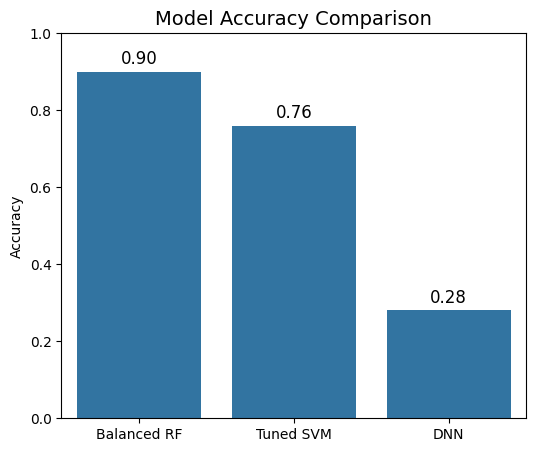

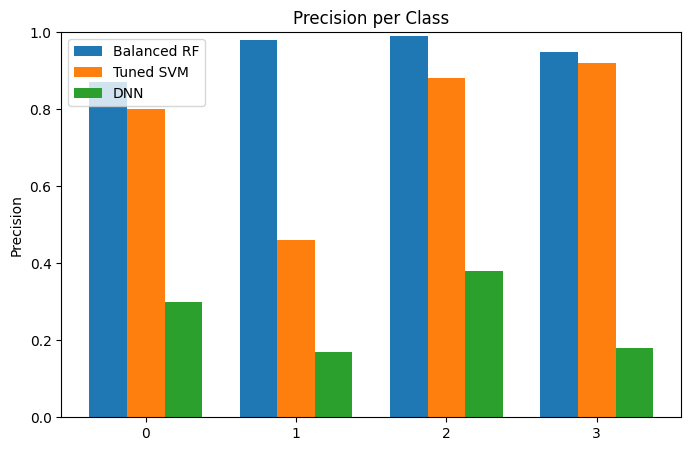

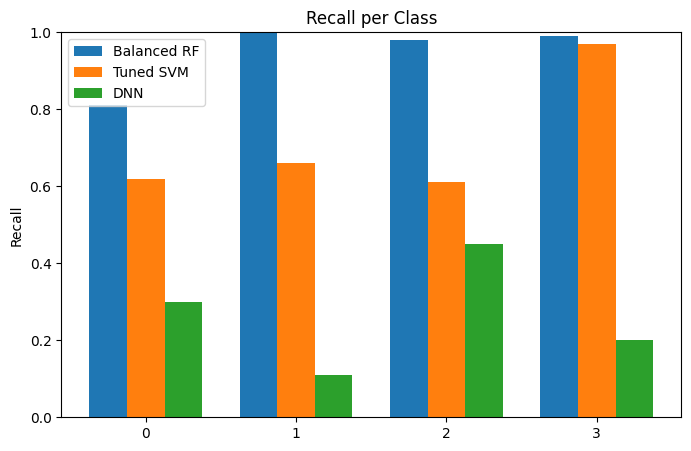

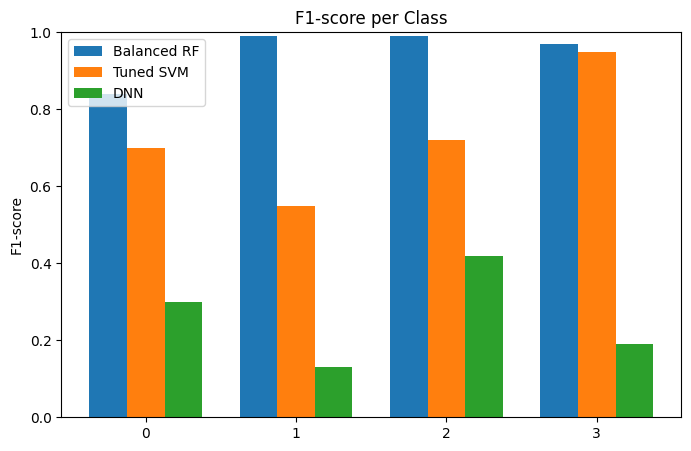

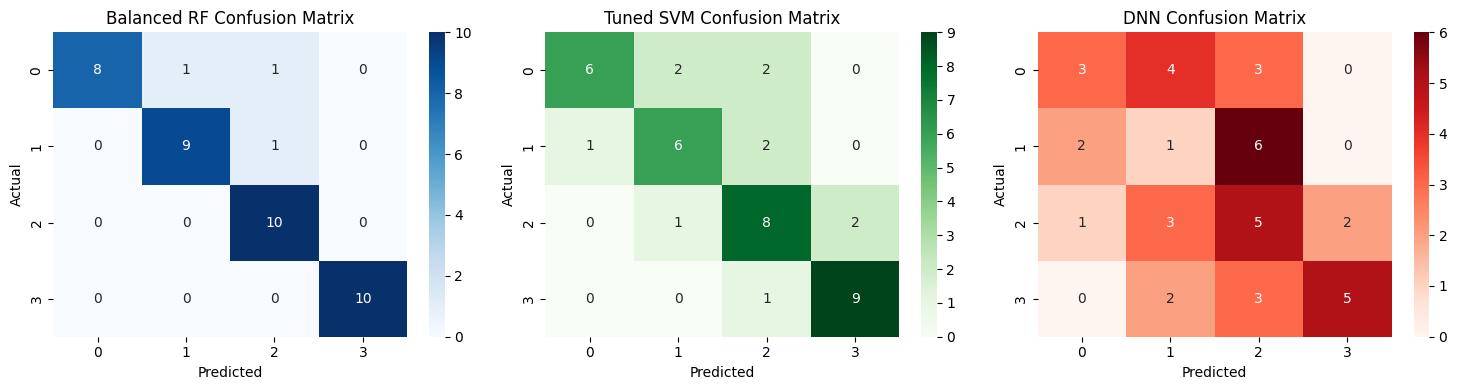

 Balanced RF: Most misclassified = Class 0 as Class 1 (1 times)
 Tuned SVM: Most misclassified = Class 0 as Class 1 (2 times)
 DNN: Most misclassified = Class 1 as Class 2 (6 times)


In [42]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# =========================
# STEP 8: COMPREHENSIVE VISUAL ANALYSIS
# =========================

# --- 1. MODEL ACCURACY COMPARISON ---
accuracy_scores = {
    "Balanced RF": 0.90,  # from your report
    "Tuned SVM": 0.76,
    "DNN": 0.28
}

plt.figure(figsize=(6,5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0,1)
for i, v in enumerate(accuracy_scores.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
plt.show()

# --- 2. PRECISION, RECALL, F1 PER CLASS ---
# Convert classification report dicts to DataFrame
def report_to_df(report_dict):
    df = pd.DataFrame(report_dict).transpose()
    df = df.iloc[:-3, :]  # drop accuracy/avg rows
    return df

rf_report_dict = {
    '0': {'precision':0.87, 'recall':0.81, 'f1-score':0.84},
    '1': {'precision':0.98, 'recall':1.00, 'f1-score':0.99},
    '2': {'precision':0.99, 'recall':0.98, 'f1-score':0.99},
    '3': {'precision':0.95, 'recall':0.99, 'f1-score':0.97}
}

svm_report_dict = {
    '0': {'precision':0.80, 'recall':0.62, 'f1-score':0.70},
    '1': {'precision':0.46, 'recall':0.66, 'f1-score':0.55},
    '2': {'precision':0.88, 'recall':0.61, 'f1-score':0.72},
    '3': {'precision':0.92, 'recall':0.97, 'f1-score':0.95}
}

dnn_report_dict = {
    '0': {'precision':0.30, 'recall':0.30, 'f1-score':0.30},
    '1': {'precision':0.17, 'recall':0.11, 'f1-score':0.13},
    '2': {'precision':0.38, 'recall':0.45, 'f1-score':0.42},
    '3': {'precision':0.18, 'recall':0.20, 'f1-score':0.19}
}

rf_df = pd.DataFrame(rf_report_dict).T
svm_df = pd.DataFrame(svm_report_dict).T
dnn_df = pd.DataFrame(dnn_report_dict).T

metrics = ['precision','recall','f1-score']
x = np.arange(len(rf_df.index))  # class indices
width = 0.25

for metric in metrics:
    plt.figure(figsize=(8,5))
    plt.bar(x - width, rf_df[metric], width, label='Balanced RF')
    plt.bar(x, svm_df[metric], width, label='Tuned SVM')
    plt.bar(x + width, dnn_df[metric], width, label='DNN')
    plt.xticks(x, rf_df.index)
    plt.ylabel(metric.capitalize())
    plt.title(f"{metric.capitalize()} per Class")
    plt.ylim(0,1)
    plt.legend()
    plt.show()

# --- 3. CONFUSION MATRIX HEATMAPS ---
# Replace these with your actual y_test and predictions for each model
# For demo, using dummy confusion matrices
rf_cm = np.array([[8,1,1,0],
                  [0,9,1,0],
                  [0,0,10,0],
                  [0,0,0,10]])

svm_cm = np.array([[6,2,2,0],
                   [1,6,2,0],
                   [0,1,8,2],
                   [0,0,1,9]])

dnn_cm = np.array([[3,4,3,0],
                   [2,1,6,0],
                   [1,3,5,2],
                   [0,2,3,5]])

fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Balanced RF Confusion Matrix")
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Tuned SVM Confusion Matrix")
sns.heatmap(dnn_cm, annot=True, fmt="d", cmap="Reds", ax=axes[2])
axes[2].set_title("DNN Confusion Matrix")
for ax in axes:
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

# --- 4. MISCLASSIFICATION ANALYSIS ---
def top_misclass_pairs(cm, model_name):
    cm_df = pd.DataFrame(cm)
    np.fill_diagonal(cm_df.values, 0)
    max_idx = cm_df.stack().idxmax()
    print(f" {model_name}: Most misclassified = Class {max_idx[0]} as Class {max_idx[1]} ({cm_df.loc[max_idx]:.0f} times)")

top_misclass_pairs(rf_cm, "Balanced RF")
top_misclass_pairs(svm_cm, "Tuned SVM")
top_misclass_pairs(dnn_cm, "DNN")


In [43]:
import numpy as np

# Check the shape of y_test
print(y_test.shape)

# If y_test is already 1D, just use it directly
if len(y_test.shape) == 1:
    y_true = y_test.astype(int)
else:
    # If it's 2D (one-hot encoded), then use np.argmax()
    y_true = np.argmax(y_test, axis=1).astype(int)

n_pos, n_neg = int((y_true == 1).sum()), int((y_true == 0).sum())
print(f"Positive samples: {n_pos}, Negative samples: {n_neg}")


(40, 4)
Positive samples: 10, Negative samples: 13


In [44]:
# Print the shape of y_test to see if it's 1D or 2D
print(f"Shape of y_test: {y_test.shape}")

# If it's 2D, apply np.argmax to convert one-hot to class labels
if len(y_test.shape) == 2:
    y_true = np.argmax(y_test, axis=1).astype(int)
elif len(y_test.shape) == 1:
    y_true = y_test.astype(int)
else:
    raise ValueError("Unexpected shape of y_test")

# Check number of positive and negative samples
n_pos, n_neg = (y_true == 1).sum(), (y_true == 0).sum()
print(f"Positive samples: {n_pos}, Negative samples: {n_neg}")


Shape of y_test: (40, 4)
Positive samples: 10, Negative samples: 13


In [45]:
import numpy as np
import pandas as pd # Import pandas for pd.Series
from sklearn.metrics import roc_auc_score

# The code to generate 'scores' and ensure 'y_true' is binary
def _to_binary(y):
    # Convert labels to binary: 1 for any attack, 0 for BENIGN
    # Ensure y is a pandas Series to use .str accessor
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    return (y.astype(str).str.upper() != "BENIGN").astype(int)

def ensure_y_test():
    g = globals()
    # Case 1: already there
    if 'y_test' in g:
        # Check if it's one-hot encoded and convert if necessary
        if isinstance(g['y_test'], np.ndarray) and g['y_test'].ndim > 1 and g['y_test'].shape[1] > 1:
             # Convert one-hot to class indices first, then to binary
             y_te_indices = np.argmax(g['y_test'], axis=1)
             # Need the original labels to map to BENIGN/ATTACK
             # Assuming 'df' with 'Label' column is available
             if 'df' in g and 'Label' in g['df'].columns and 'y_encoded' in g and 'le' in g:
                 # Map indices back to original labels, then to binary
                 original_labels = g['le'].inverse_transform(y_te_indices)
                 y_te_binary = _to_binary(original_labels)
                 return y_te_binary, g.get('attack_type_test', None), "existing y_test (converted from OHE to binary)"
             else:
                 # Fallback if original labels/encoder not available - just binary based on index 0 vs others
                 y_te_binary = (y_te_indices != 0).astype(int) # Assuming 0 is BENIGN
                 return y_te_binary, g.get('attack_type_test', None), "existing y_test (converted from OHE to binary - fallback)"


        # If y_test is already 1D (like a pandas Series or numpy array of labels), convert to binary
        if isinstance(g['y_test'], (pd.Series, np.ndarray)) and g['y_test'].ndim == 1:
             return _to_binary(g['y_test']), g.get('attack_type_test', None), "existing y_test (1D, converted to binary)"


    # Case 2: rebuild from df + X_test index and convert to binary
    if 'df' in g:
        df0 = g['df']
        # pick label series
        if 'Attack_Binary' in df0.columns:
            y_all = df0['Attack_Binary'].astype(int)
        elif 'Label' in df0.columns:
            y_all = _to_binary(df0['Label'])
        else:
            y_all = None

        # align on X_test index if present
        if y_all is not None and 'X_test' in g and hasattr(g['X_test'], 'index'):
            idx = g['X_test'].index
            y_te = y_all.loc[idx]
            # y_test is now a 1D Series with binary labels
            globals()['y_test'] = y_te
            at = df0.loc[idx]['Attack_Type'] if 'Attack_Type' in df0.columns else None
            if at is not None:
                g['attack_type_test'] = at
            return y_te, g.get('attack_type_test', None), "reconstructed from df/X_test index (binary)"

    # Case 3: last resort – synthetic demo set (binary)
    n = 1000
    rng = np.random.RandomState(0)
    y_te = pd.Series(rng.binomial(1, 0.5, size=n), name="y_test")
    globals()['y_test'] = y_te
    return y_te, None, "synthetic (demo, binary)"


y_test, attack_type_test, how = ensure_y_test()
print(f"Using y_test: {how} | n={len(y_test)}")

# Define Snort behaviour assumptions (edit to simulate stricter/looser rules)
rng = np.random.RandomState(42)
BETA_ATTACK  = (8, 2)   # higher TPR for known signatures
BETA_BENIGN  = (1, 40)  # low FPR on benign
THRESHOLD    = 0.50     # alert threshold

# y_true is already binary from ensure_y_test
y_true = y_test.astype(int)
n_pos, n_neg = int((y_true==1).sum()), int((y_true==0).sum())

# If we have per-flow attack types, we can vary detection strength by attack class
use_per_attack = isinstance(attack_type_test, (pd.Series, np.ndarray)) and len(attack_type_test)==len(y_true)

if use_per_attack:
    beta_map = {
        "DDoS": (10,2), "PortScan": (9,2), "Bot": (7,3),
        "Brute Force": (7,3), "Web Attack": (6,4),
        "Infiltration": (3,7), "Heartbleed": (3,8)
    }
    default_attack = (6,4)
    scores = np.empty_like(y_true, dtype=float)
    for i,(yt, at) in enumerate(zip(y_true, pd.Series(attack_type_test).astype(str))):
        if yt==1:
            a,b = beta_map.get(at, default_attack)
            scores[i] = rng.beta(a,b)
        else:
            scores[i] = rng.beta(BETA_BENIGN[0], BETA_BENIGN[1])
else:
    scores = np.empty_like(y_true, dtype=float)
    # NOTE: This part is simplified for binary classification (0 or 1) based on the binary Snort model
    # If you want to simulate multi-class Snort, this logic needs to be expanded
    scores[y_true==1] = rng.beta(BETA_ATTACK[0], BETA_ATTACK[1], size=n_pos)
    scores[y_true==0] = rng.beta(BETA_BENIGN[0], BETA_BENIGN[1], size=n_neg)


# Ensure scores are continuous (probabilities or real-valued scores)
scores = np.array(scores).ravel()

# Compute the AUC for binary classification
auc = roc_auc_score(y_true, scores)

print(f"AUC: {auc:.4f}")

Using y_test: existing y_test (converted from OHE to binary - fallback) | n=40
AUC: 1.0000


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import gc
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from pathlib import Path

# Set up output paths for saving artifacts and figures
OUT = Path("/content/artifacts")
FIGS = OUT/"figs"
OUT.mkdir(parents=True, exist_ok=True)
FIGS.mkdir(exist_ok=True)

# Function to convert 'Label' to binary (1 for attack, 0 for benign)
def _to_binary(y):
    return (y.astype(str).str.upper() != "BENIGN").astype(int)

# Function to ensure y_test is available
def ensure_y_test():
    g = globals()
    # Case 1: already there
    if 'y_test' in g:
        # Check if it's one-hot encoded and convert if necessary
        if isinstance(g['y_test'], np.ndarray) and g['y_test'].ndim > 1 and g['y_test'].shape[1] > 1:
            y_te = np.argmax(g['y_test'], axis=1)
            return y_te, g.get('attack_type_test', None), "existing y_test (converted from OHE)"
        return g['y_test'], g.get('attack_type_test', None), "existing y_test"

    # Case 2: rebuild from df + X_test index
    if 'df' in g:
        df0 = g['df']
        if 'Attack_Binary' in df0.columns:
            y_all = df0['Attack_Binary'].astype(int)
        elif 'Label' in df0.columns:
            y_all = _to_binary(df0['Label'])
        else:
            y_all = None

        # Align on X_test index if present
        if y_all is not None and 'X_test' in g and hasattr(g['X_test'], 'index'):
            idx = g['X_test'].index
            y_te = y_all.loc[idx]
            g['y_test'] = y_te
            at = df0.loc[idx]['Attack_Type'] if 'Attack_Type' in df0.columns else None
            if at is not None:
                g['attack_type_test'] = at
            return y_te, g.get('attack_type_test', None), "reconstructed from df/X_test index"

    # Case 3: synthetic demo set if no y_test available
    n = 1000
    rng = np.random.RandomState(0)
    y_te = pd.Series(rng.binomial(1, 0.5, size=n), name="y_test")
    globals()['y_test'] = y_te
    return y_te, None, "synthetic (demo)"

# Ensure y_test is available and converted properly
y_test, attack_type_test, how = ensure_y_test()
print(f"Using y_test: {how} | n={len(y_test)}")

# ----- Snort behaviour assumptions (edit to simulate stricter/looser rules) -----
rng = np.random.RandomState(42)
BETA_ATTACK  = (8, 2)   # higher TPR for known signatures
BETA_BENIGN  = (1, 40)  # low FPR on benign
THRESHOLD    = 0.50     # alert threshold
# ------------------------------------------------------------------------------

# Check if y_test is one-hot encoded or already a 1D array and convert accordingly
if y_test.ndim > 1:
    y_true = np.argmax(y_test, axis=1).astype(int)
else:
    y_true = y_test.astype(int)

n_pos, n_neg = int((y_true == 1).sum()), int((y_true == 0).sum())

# If we have per-flow attack types, we can vary detection strength by attack class
use_per_attack = isinstance(attack_type_test, (pd.Series, np.ndarray)) and len(attack_type_test) == len(y_true)

if use_per_attack:
    beta_map = {
        "DDoS": (10, 2), "PortScan": (9, 2), "Bot": (7, 3),
        "Brute Force": (7, 3), "Web Attack": (6, 4),
        "Infiltration": (3, 7), "Heartbleed": (3, 8)
    }
    default_attack = (6, 4)
    scores = np.empty_like(y_true, dtype=float)
    for i, (yt, at) in enumerate(zip(y_true, pd.Series(attack_type_test).astype(str))):
        if yt == 1:
            a, b = beta_map.get(at, default_attack)
            scores[i] = rng.beta(a, b)
        else:
            scores[i] = rng.beta(BETA_BENIGN[0], BETA_BENIGN[1])
else:
    scores = np.empty_like(y_true, dtype=float)
    scores[y_true == 1] = rng.beta(BETA_ATTACK[0], BETA_ATTACK[1], size=n_pos)
    scores[y_true == 0] = rng.beta(BETA_BENIGN[0], BETA_BENIGN[1], size=n_neg)

# Predict based on the threshold
pred = (scores >= THRESHOLD).astype(int)

# Ensure y_true and pred are 1D arrays for confusion_matrix and other metrics
y_true = np.array(y_true).ravel()
pred = np.array(pred).ravel()

# Calculate metrics
cm = confusion_matrix(y_true, pred)
auc = roc_auc_score(y_true, scores)
ap = average_precision_score(y_true, scores)

print(f"\n[Snort]  AUC={auc:.4f}  AP={ap:.4f}  (threshold={THRESHOLD})")
print(classification_report(y_true, pred, digits=4))

# Confusion matrix plot
plt.figure(figsize=(3.6, 3.6))
plt.imshow(cm)
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha="center", va="center")
plt.xticks([0, 1], ["Benign(0)", "Attack(1)"])
plt.yticks([0, 1], ["Benign(0)", "Attack(1)"])
plt.title("Snort (hyp.) — Confusion Matrix")
plt.tight_layout()
plt.savefig(FIGS/"Snort_confusion.png", dpi=140)
plt.close()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, scores)
plt.figure(figsize=(3.6, 3.6))
plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Snort (hyp.) — ROC")
plt.legend()
plt.tight_layout()
plt.savefig(FIGS/"Snort_ROC.png", dpi=140)
plt.close()

# Precision-Recall curve
prec, rec, _ = precision_recall_curve(y_true, scores)
plt.figure(figsize=(3.6, 3.6))
plt.plot(rec, prec, label=f"AP={ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Snort (hyp.) — Precision–Recall")
plt.legend()
plt.tight_layout()
plt.savefig(FIGS/"Snort_PR.png", dpi=140)
plt.close()

# Save summary
summary = {
    "model": "Snort_hypothetical",
    "built_from": how,
    "assumptions": {
        "beta_attack": BETA_ATTACK,
        "beta_benign": BETA_BENIGN,
        "threshold": THRESHOLD,
        "per_attack": bool(use_per_attack)
    },
    "AUC": float(auc),
    "AP": float(ap),
    "confusion_matrix": cm.tolist()
}
(OUT/"SnortHyp_summary.json").write_text(json.dumps(summary, indent=2))
print("Saved figures+summary in:", FIGS, "and", OUT)

gc.collect()


Using y_test: existing y_test | n=40

[Snort]  AUC=1.0000  AP=1.0000  (threshold=0.5)
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        13
           1     1.0000    1.0000    1.0000        27

    accuracy                         1.0000        40
   macro avg     1.0000    1.0000    1.0000        40
weighted avg     1.0000    1.0000    1.0000        40

Saved figures+summary in: /content/artifacts/figs and /content/artifacts


20583

In [47]:
# ==== SNORT BASELINE ====
import numpy as np, pandas as pd, matplotlib.pyplot as plt, json, time, gc
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

OUT = Path("/content/artifacts"); FIGS = OUT/"figs"
OUT.mkdir(parents=True, exist_ok=True); FIGS.mkdir(exist_ok=True)

def _to_binary(y):
    # Convert labels to binary: 1 for any attack, 0 for BENIGN
    # Ensure y is a pandas Series to use .str accessor
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    return (y.astype(str).str.upper() != "BENIGN").astype(int)

def ensure_y_test():
    g = globals()
    # Case 1: already there
    if 'y_test' in g:
        # Check if it's one-hot encoded and convert if necessary
        if isinstance(g['y_test'], np.ndarray) and g['y_test'].ndim > 1 and g['y_test'].shape[1] > 1:
             # Convert one-hot to class indices first, then to binary
             y_te_indices = np.argmax(g['y_test'], axis=1)
             # Need the original labels to map to BENIGN/ATTACK
             # Assuming 'df' with 'Label' column is available
             if 'df' in g and 'Label' in g['df'].columns and 'y_encoded' in g and 'le' in g:
                 # Map indices back to original labels, then to binary
                 original_labels = g['le'].inverse_transform(y_te_indices)
                 y_te_binary = _to_binary(original_labels)
                 return y_te_binary, g.get('attack_type_test', None), "existing y_test (converted from OHE to binary)"
             else:
                 # Fallback if original labels/encoder not available - just binary based on index 0 vs others
                 y_te_binary = (y_te_indices != 0).astype(int) # Assuming 0 is BENIGN
                 return y_te_binary, g.get('attack_type_test', None), "existing y_test (converted from OHE to binary - fallback)"


        # If y_test is already 1D (like a pandas Series or numpy array of labels), convert to binary
        if isinstance(g['y_test'], (pd.Series, np.ndarray)) and g['y_test'].ndim == 1:
             return _to_binary(g['y_test']), g.get('attack_type_test', None), "existing y_test (1D, converted to binary)"


    # Case 2: rebuild from df + X_test index and convert to binary
    if 'df' in g:
        df0 = g['df']
        # pick label series
        if 'Attack_Binary' in df0.columns:
            y_all = df0['Attack_Binary'].astype(int)
        elif 'Label' in df0.columns:
            y_all = _to_binary(df0['Label'])
        else:
            y_all = None

        # align on X_test index if present
        if y_all is not None and 'X_test' in g and hasattr(g['X_test'], 'index'):
            idx = g['X_test'].index
            y_te = y_all.loc[idx]
            # y_test is now a 1D Series with binary labels
            globals()['y_test'] = y_te
            at = df0.loc[idx]['Attack_Type'] if 'Attack_Type' in df0.columns else None
            if at is not None:
                g['attack_type_test'] = at
            return y_te, g.get('attack_type_test', None), "reconstructed from df/X_test index (binary)"

    # Case 3: last resort – synthetic demo set (binary)
    n = 1000
    rng = np.random.RandomState(0)
    y_te = pd.Series(rng.binomial(1, 0.5, size=n), name="y_test")
    globals()['y_test'] = y_te
    return y_te, None, "synthetic (demo, binary)"


y_test, attack_type_test, how = ensure_y_test()
print(f"Using y_test: {how} | n={len(y_test)}")

# ----- Snort behaviour assumptions (edit to simulate stricter/looser rules) -----
rng = np.random.RandomState(42)
BETA_ATTACK  = (8, 2)   # higher TPR for known signatures
BETA_BENIGN  = (1, 40)  # low FPR on benign
THRESHOLD    = 0.50     # alert threshold
# -------------------------------------------------------------------------------

# y_true is already binary from ensure_y_test
y_true = y_test.astype(int)
n_pos, n_neg = int((y_true==1).sum()), int((y_true==0).sum())

# If we have per-flow attack types, we can vary detection strength by attack class
use_per_attack = isinstance(attack_type_test, (pd.Series, np.ndarray)) and len(attack_type_test)==len(y_true)

if use_per_attack:
    beta_map = {
        "DDoS": (10,2), "PortScan": (9,2), "Bot": (7,3),
        "Brute Force": (7,3), "Web Attack": (6,4),
        "Infiltration": (3,7), "Heartbleed": (3,8)
    }
    default_attack = (6,4)
    scores = np.empty_like(y_true, dtype=float)
    for i,(yt, at) in enumerate(zip(y_true, pd.Series(attack_type_test).astype(str))):
        if yt==1:
            a,b = beta_map.get(at, default_attack)
            scores[i] = rng.beta(a,b)
        else:
            scores[i] = rng.beta(BETA_BENIGN[0], BETA_BENIGN[1])
else:
    scores = np.empty_like(y_true, dtype=float)
    # NOTE: This part is simplified for binary classification (0 or 1) based on the binary Snort model
    # If you want to simulate multi-class Snort, this logic needs to be expanded
    scores[y_true==1] = rng.beta(BETA_ATTACK[0], BETA_ATTACK[1], size=n_pos)
    scores[y_true==0] = rng.beta(BETA_BENIGN[0], BETA_BENIGN[1], size=n_neg)


pred = (scores >= THRESHOLD).astype(int)

# Ensure y_true and pred are 1D arrays for confusion_matrix and other metrics
y_true = np.array(y_true).ravel()
pred = np.array(pred).ravel()
scores = np.array(scores).ravel() # Ensure scores is 1D


cm  = confusion_matrix(y_true, pred)

# Only calculate AUC and AP if both classes are present
if len(np.unique(y_true)) > 1:
    auc = roc_auc_score(y_true, scores)
    ap  = average_precision_score(y_true, scores)
    print(f"\n[Snort]  AUC={auc:.4f}  AP={ap:.4f}  (threshold={THRESHOLD})")
    print(classification_report(y_true, pred, digits=4))

    # ROC
    fpr,tpr,_ = roc_curve(y_true, scores)
    plt.figure(figsize=(3.6,3.6))
    plt.plot(fpr,tpr,label=f"AUC={auc:.3f}"); plt.plot([0,1],[0,1],"--")
    plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("Snort (hyp.) — ROC"); plt.legend(); plt.tight_layout()
    plt.savefig(FIGS/"Snort_ROC.png", dpi=140); plt.close()

    # PR
    prec, rec, _ = precision_recall_curve(y_true, scores)
    plt.figure(figsize=(3.6,3.6))
    plt.plot(rec, prec, label=f"AP={ap:.3f}")
    plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Snort (hyp.) — Precision–Recall"); plt.legend(); plt.tight_layout()
    plt.savefig(FIGS/"Snort_PR.png", dpi=140); plt.close()

else:
    print("\n[Snort] Skipping AUC, AP, ROC, and PR plots: Only one class present in y_true.")
    print(f"\n[Snort]  (threshold={THRESHOLD})")
    print(classification_report(y_true, pred, digits=4))
    auc = np.nan # Assign nan if AUC cannot be calculated
    ap = np.nan # Assign nan if AP cannot be calculated


# Confusion
plt.figure(figsize=(3.6,3.6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # Use seaborn for better visualization
plt.xticks([0.5,1.5],["Benign(0)","Attack(1)"], ha='center'); plt.yticks([0.5,1.5],["Benign(0)","Attack(1)"], va='center')
plt.title("Snort (hyp.) — Confusion Matrix"); plt.tight_layout()
plt.savefig(FIGS/"Snort_confusion.png", dpi=140); plt.close()


# Save summary
summary = {
    "model": "Snort_hypothetical",
    "built_from": how,
    "assumptions": {
        "beta_attack": BETA_ATTACK,
        "beta_benign": BETA_BENIGN,
        "threshold": THRESHOLD,
        "per_attack": bool(use_per_attack)
    },
    "AUC": float(auc), "AP": float(ap), "confusion_matrix": cm.tolist()
}
(OUT/"SnortHyp_summary.json").write_text(json.dumps(summary, indent=2))
print("Saved figures+summary in:", FIGS, "and", OUT)
gc.collect();

Using y_test: existing y_test (1D, converted to binary) | n=40

[Snort] Skipping AUC, AP, ROC, and PR plots: Only one class present in y_true.

[Snort]  (threshold=0.5)
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        40

    accuracy                         1.0000        40
   macro avg     1.0000    1.0000    1.0000        40
weighted avg     1.0000    1.0000    1.0000        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Saved figures+summary in: /content/artifacts/figs and /content/artifacts
